<a href="https://colab.research.google.com/github/LiLAlien28/Arch_Tech_internship/blob/main/Task2_MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep learning (optional - for better accuracy)
from sklearn.neural_network import MLPClassifier

# Load MNIST dataset
from sklearn.datasets import fetch_openml

print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Pixel values range: {X.min().astype(int)} to {X.max().astype(int)}")

Loading MNIST dataset...
Dataset shape: (70000, 784)
Target shape: (70000,)
Pixel values range: pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64 to pixel1       0
pixel2       0
pixel3       0
pixel4       0
pixel5       0
            ..
pixel780    62
pixel781     0
pixel782     0
pixel783     0
pixel784     0
Length: 784, dtype: int64


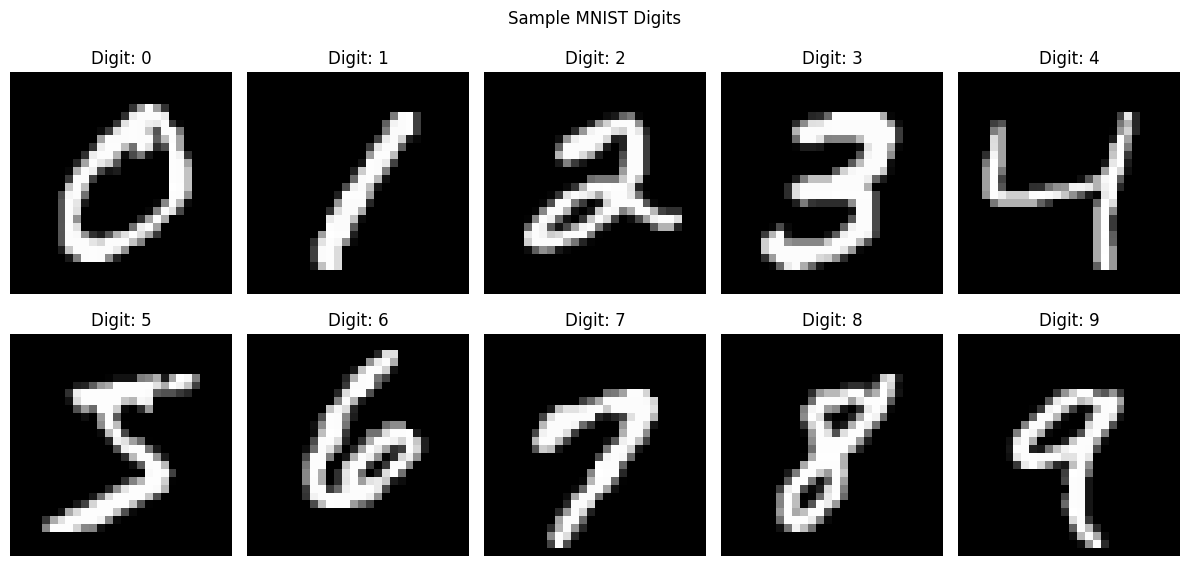

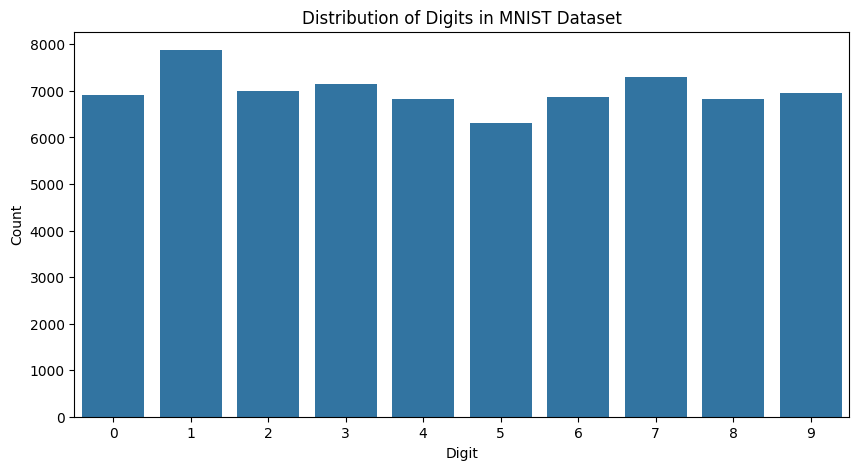


Class distribution:
class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


In [2]:
# Display sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    # Find first occurrence of each digit
    idx = np.where(y == i)[0][0]
    axes[i].imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Digit: {i}')
    axes[i].axis('off')

plt.suptitle('Sample MNIST Digits')
plt.tight_layout()
plt.show()

# Check class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Distribution of Digits in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

print("\nClass distribution:")
print(y.value_counts().sort_index())

In [3]:
# Normalize pixel values (0-255 -> 0-1)
X = X / 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (56000, 784)
Testing set: (14000, 784)


In [4]:
# Define models (simpler ones for faster training)
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy:.4f}")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Predictions': y_pred
    })

# Find best model
best_result = max(results, key=lambda x: x['Accuracy'])
print(f"\n✅ Best Model: {best_result['Model']} with accuracy: {best_result['Accuracy']:.4f}")


Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9714

Training Random Forest...
Random Forest Accuracy: 0.9640

Training Neural Network...
Neural Network Accuracy: 0.9755

✅ Best Model: Neural Network with accuracy: 0.9755


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


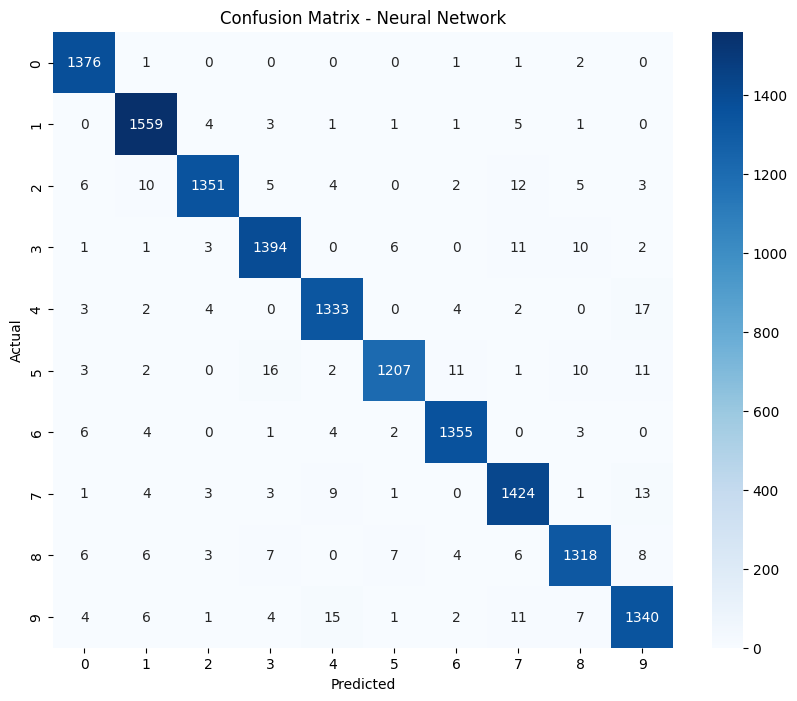


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1381
           1       0.98      0.99      0.98      1575
           2       0.99      0.97      0.98      1398
           3       0.97      0.98      0.97      1428
           4       0.97      0.98      0.98      1365
           5       0.99      0.96      0.97      1263
           6       0.98      0.99      0.98      1375
           7       0.97      0.98      0.97      1459
           8       0.97      0.97      0.97      1365
           9       0.96      0.96      0.96      1391

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


Total Misclassifications: 343 out of 14000


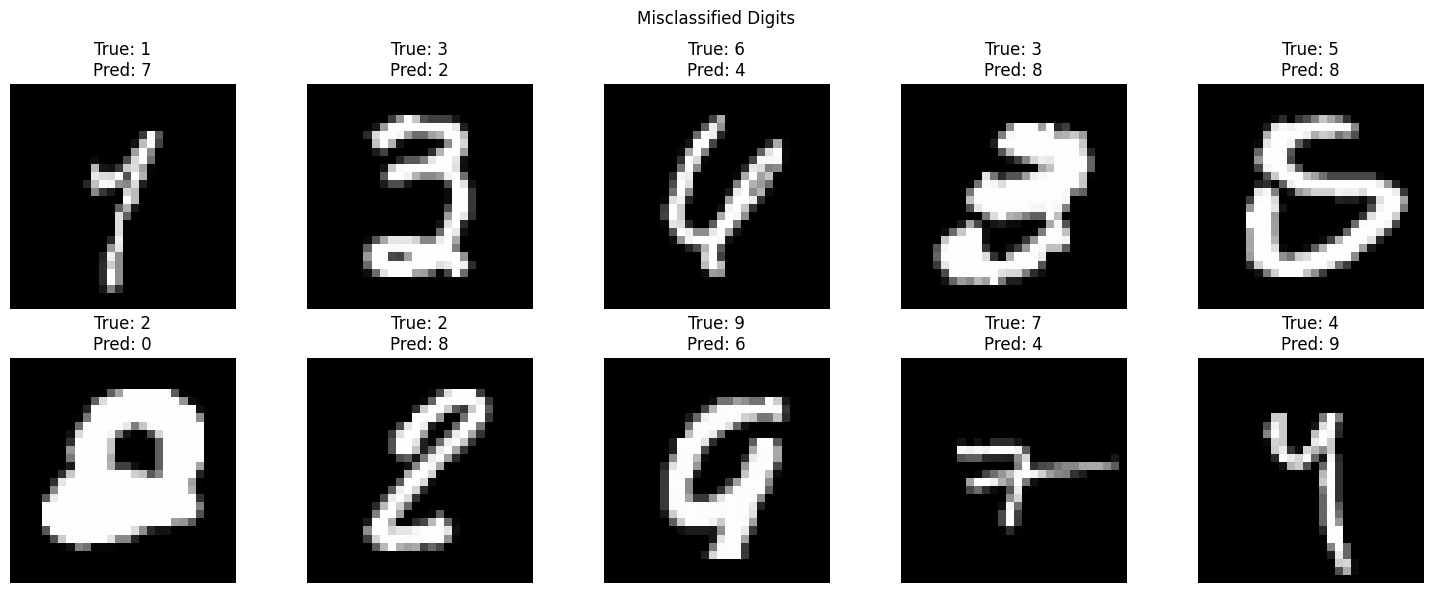

In [5]:
# Get best model predictions
best_model_name = best_result['Model']
best_model = models[best_model_name]
y_pred_best = best_result['Predictions']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Show misclassified examples
misclassified = np.where(y_test != y_pred_best)[0]

if len(misclassified) > 0:
    print(f"\nTotal Misclassifications: {len(misclassified)} out of {len(y_test)}")

    # Display some misclassified examples
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(min(10, len(misclassified))):
        idx = misclassified[i]
        axes[i].imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
        axes[i].set_title(f'True: {y_test.iloc[idx]}\nPred: {y_pred_best[idx]}')
        axes[i].axis('off')

    plt.suptitle('Misclassified Digits')
    plt.tight_layout()
    plt.show()

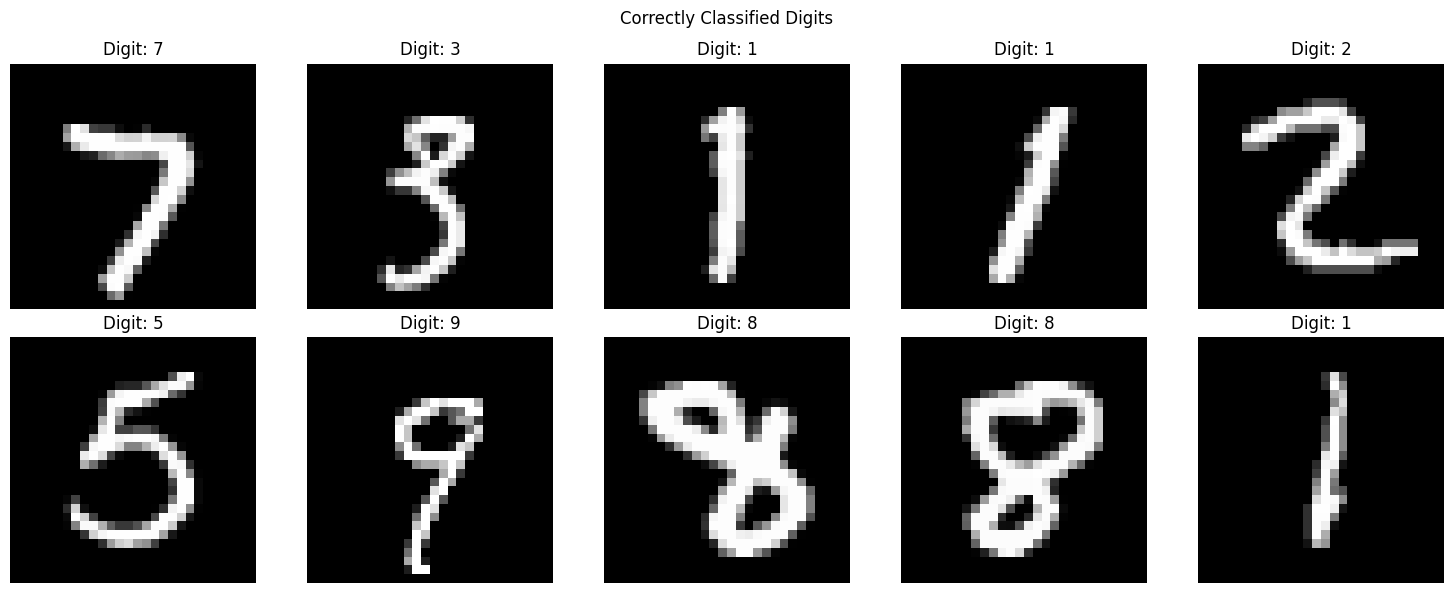


FINAL MODEL: Neural Network
TEST ACCURACY: 0.9755 (97.55%)


In [7]:
# Show some correct predictions
correct = np.where(y_test == y_pred_best)[0]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    idx = correct[i]
    axes[i].imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Digit: {y_test.iloc[idx]}')
    axes[i].axis('off')

plt.suptitle('Correctly Classified Digits')
plt.tight_layout()
plt.show()

# Final accuracy
print(f"\n{'='*50}")
print(f"FINAL MODEL: {best_model_name}")
print(f"TEST ACCURACY: {best_result['Accuracy']:.4f} ({best_result['Accuracy']*100:.2f}%)")
print(f"{'='*50}")

In [8]:
import joblib

# Save the best model
model_filename = f'mnist_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as: {model_filename}")

# Download model (for Colab)
from google.colab import files
files.download(model_filename)


Model saved as: mnist_neural_network.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>